In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [105]:
df = pd.read_csv("house_prices.csv")

In [106]:
# Define a conversion factor for sqm to sqft
sqm_to_sqft = 10.7639

# Function to convert values to sqft
def convert_to_sqft(value):
    if 'sqft' in value:
        return float(value.replace(' sqft', ''))
    elif 'sqm' in value:
        return float(value.replace(' sqm', '')) * sqm_to_sqft
    return None  # for any unexpected values or NaN

# Apply the conversion function to the CarpetArea column
df['CarpetArea'] = df['CarpetArea'].apply(lambda x: convert_to_sqft(x) if isinstance(x, str) else x)

# Calculate the mean of the non-null values
avg_value = df['CarpetArea'].mean()

# Fill null values with the average
df['CarpetArea'].fillna(avg_value, inplace=True)

avg = df['Price'].mean()

df['Price'].fillna(avg,inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_33300\2850781525.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CarpetArea'].fillna(avg_value, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_33300\2850781525.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

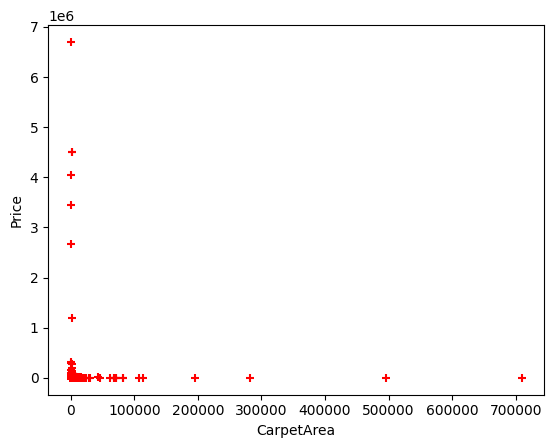

In [107]:
%matplotlib inline
plt.xlabel('CarpetArea')
plt.ylabel('Price')
plt.scatter(df.CarpetArea,df.Price, color = 'red', marker='+')

In [108]:
reg = linear_model.LinearRegression()
reg.fit(df[['CarpetArea']],df.Price)

LinearRegression()

In [109]:
reg.predict([[1200]])

c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([7577.29699776])

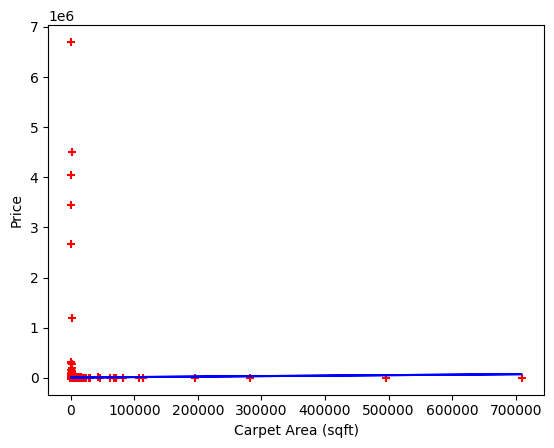

In [110]:
import matplotlib.pyplot as plt
from sklearn import linear_model

# Create and fit the LinearRegression model
reg = linear_model.LinearRegression()
reg.fit(df[['CarpetArea']], df['Price'])

# Plot the actual data points
plt.scatter(df['CarpetArea'], df['Price'], color='red', marker='+')
plt.xlabel('Carpet Area (sqft)')
plt.ylabel('Price')

# Plot the regression line
plt.plot(df['CarpetArea'], reg.predict(df[['CarpetArea']]), color='blue')

plt.show()
